[< Back to homepage](/notebooks/Home.ipynb)

# iPython Advanced testing

In [9]:
%run saql_init.py

## Your First SAQL Query

SAQL queries are a sequence of steps, much like in a programming language, each of which carries out a single data transformation. Try running the SAQL query bellow:

In [10]:
%%saql
q = load "opportunities";
q = group q by all;
q = foreach q generate count() as 'count';

User "kim@waverocks.de" running query on https://na30.salesforce.com


,count
0,706


# Save as a CSV

In [11]:
%%saql csv
q = load "opportunities";
q = group q by 'Account.Industry';
q = foreach q generate 'Account.Industry' as Industry, sum('Amount') as 'sum_Amount';
q = order q by 'sum_Amount' desc; 
q = limit q 2000;

User "kim@waverocks.de" running query on https://na30.salesforce.com


,Industry,sum_Amount
0,Banking,74618602.0
1,Energy,63201449.0
2,Biotechnology,60253486.0
3,Technology,57727272.0
4,Apparel,54939473.0
5,Engineering,50796006.0
6,Insurance,50273399.0
7,Electronics,50186896.0
8,Education,42096223.0
9,Consulting,38802688.0


In [4]:
industries_revenues = _

In [5]:
industries_revenues.plot(kind='bar', legend=True, figsize = (15, 5))

In [6]:
industries_revenues['Industry'].value_counts()

Insurance             1
Technology            1
Consulting            1
Transportation        1
Finance               1
Education             1
Energy                1
Agriculture           1
Utilities             1
Retail                1
Communications        1
Banking               1
Engineering           1
Media                 1
Healthcare            1
Apparel               1
Biotechnology         1
Electronics           1
Manufacturing         1
Telecommunications    1
Name: Industry, dtype: int64

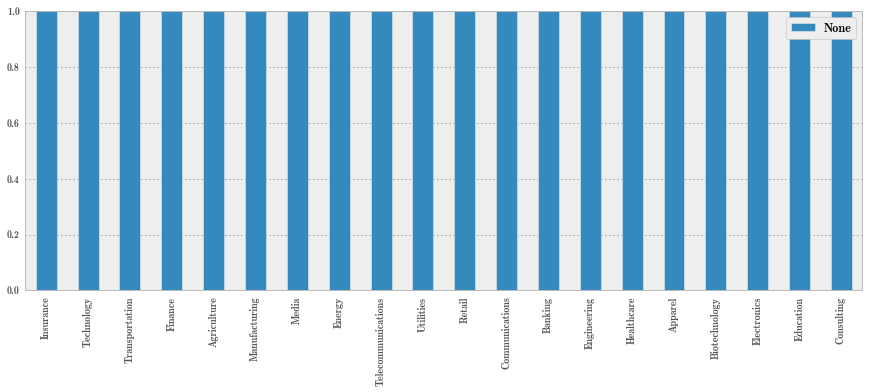

In [390]:
industries_revenues['Industry'].value_counts().plot(kind='bar', legend=True, figsize = (15, 5))

In [102]:
industries_revenues.groupby('Industry').aggregate(sum)

,sum_Amount
Industry,
Agriculture,20695307
Apparel,47180003
Banking,65892584
Biotechnology,54785716
Communications,24105631
Consulting,38357361
Education,42047848
Electronics,50244759
Energy,64652635


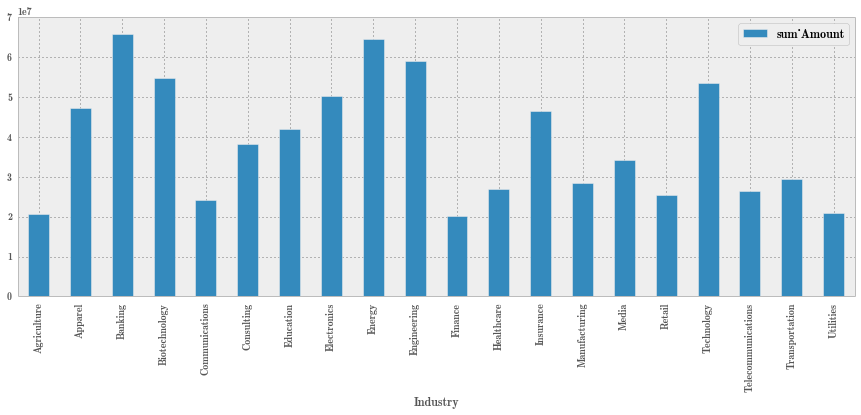

In [391]:
industries_revenues.groupby('Industry').aggregate(sum).plot(kind='bar', legend=True, figsize = (15, 5))

In [18]:
%%saql
q = load "opportunities";
q = group q by ('CloseDate_Year', 'CloseDate_Quarter');
q = foreach q generate 'CloseDate_Year' + "~~~" + 'CloseDate_Quarter' as
'CloseDate_Year~~~CloseDate_Quarter', ((sum('Amount') / sum(sum('Amount'))
over([-1 .. -1] partition by all order by ('CloseDate_Year',
'CloseDate_Quarter'))) - 1) as 'sum_QoQ';

Running query on: https://na30.salesforce.com


,CloseDate_Year~~~CloseDate_Quarter,sum_QoQ
0,2015~~~1,NaN
1,2015~~~2,0.281156
2,2015~~~3,0.694430
3,2015~~~4,0.379414
4,2016~~~1,-0.089058
5,2016~~~2,-0.152189
6,2016~~~3,-0.405879
7,2016~~~4,-0.786054
